In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Principal Component Analysis
This is a educational example to illustrate in an intuitive way the inner workings of PCA. We start with a 2D-dataset of 10 points. Hence $X \sim (10,2)$ 

In [94]:
df = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/PLS_PCR_Comp.csv')
df.head()

,X1,X2
0,0.07,-0.26
1,-0.89,-0.15
2,0.84,-0.57
3,-0.70,0.23
4,1.34,-1.59


In [39]:
X = df.values.reshape(-1,2)

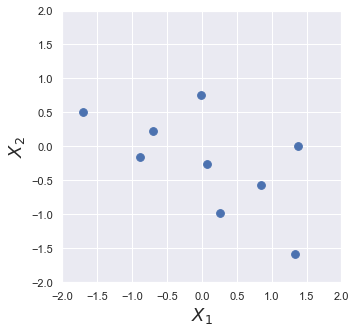

In [41]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(X[:,0], X[:,1], marker='o',s=60)

ax.set_xlabel('$X_1$',fontsize=18)
ax.set_ylabel('$X_2$',fontsize=18)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2]);


In a next step, we project the datapoints on a line crossing the origin $(0,0)$ and with an angle `alpha` vs. the horizontal axis. The project of the 10 points leads to 10 scalar values $y_i$. For each value of alpha the variance of the $y$ is calculated

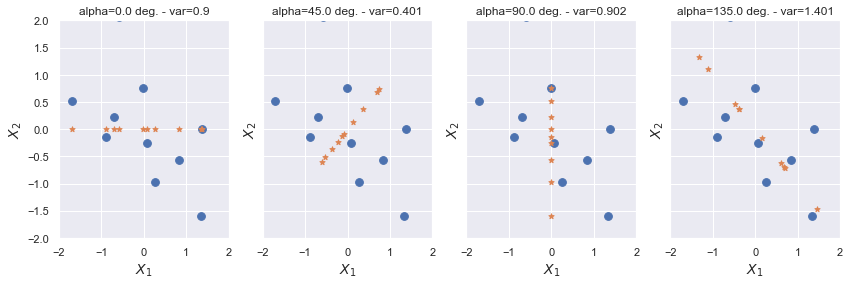

In [74]:
alpha = np.arange(0,np.pi,np.pi/4)
fig,ax=plt.subplots(1,4,figsize=(14,4),sharey=True)

for i in np.arange(0,len(alpha)):
    v1=np.cos(alpha[i])
    v2 = np.sin(alpha[i])
    v = np.array([v1,v2]).reshape(2,-1)
    Y=np.dot(X,v)
    ax[i].scatter(X[:,0], X[:,1], marker='o',s=60)
    x1_projected=Y*np.cos(alpha[i])
    x2_projected=Y*np.sin(alpha[i])
    ax[i].scatter(x1_projected,x2_projected, marker='*',s=30)
    ax[i].set_xlabel('$X_1$',fontsize=14)
    ax[i].set_ylabel('$X_2$',fontsize=14)
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2]);
    ax[i].set_title('alpha='+str(np.round(alpha[i]*180/np.pi,2))+' deg.'+' - var='+str(np.round(np.var(Y),3)),fontsize=12)


One value of alpha has a maximum variance, the direction with the smallest variance is orthogonal to the first direction

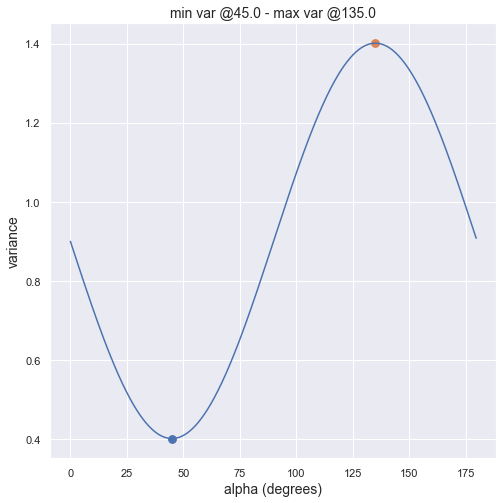

In [96]:
alpha = np.arange(0,np.pi,np.pi/400)
var_y = []
for i in np.arange(0,len(alpha)):
    v1=np.cos(alpha[i])
    v2 = np.sin(alpha[i])
    v = np.array([v1,v2]).reshape(2,-1)
    Y=np.dot(X,v)
    var_y.append(np.var(Y))
idx = np.argsort(var_y)
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(alpha*180/np.pi,var_y)
ax.scatter(alpha[idx[0]]*180/np.pi,var_y[idx[0]],s=60)
ax.scatter(alpha[idx[-1]]*180/np.pi,var_y[idx[-1]],s=60)
ax.set_xlabel('alpha (degrees)',fontsize=14 )
ax.set_ylabel('variance',fontsize=14 );
ax.set_title('min var @'+str(np.round(alpha[idx[0]]*180/np.pi,2))+
             ' - max var @'+str(np.round(alpha[idx[-1]]*180/np.pi,2)),fontsize=14 );